<a href="https://colab.research.google.com/github/DanielZafra4/Proyecto_Final_Zafra_DS1/blob/main/Proyecto_Final_Zafra_Daniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**An√°lisis Car Accident Dataset**

##**1. Descripci√≥n de la tem√°tica**

El presente proyecto tiene como objetivo analizar un dataset detallado sobre accidentes de autom√≥viles ocurridos en un √°rea urbana durante enero de 2021. Este conjunto de datos extraido de la plataforma ***Kaggle (***https://www.kaggle.com/datasets/nextmillionaire/car-accident-dataset)
 incluye informaci√≥n clave, como la fecha y el d√≠a de la semana en que ocurrieron los accidentes, el tipo de control en intersecciones, la gravedad de los accidentes, entre otros.

El an√°lisis se realiza con el prop√≥sito de identificar patrones significativos en los accidentes viales, con especial √©nfasis en comprender los factores que los provocan y aumentan su severidad. Los resultados servir√°n como base para dise√±ar estrategias de prevenci√≥n y mejora en la seguridad vial, buscando reducir la ocurrencia de accidentes y mitigar su impacto.

Espec√≠ficamente, este an√°lisis busca:


*   **Detectar puntos cr√≠ticos y horarios de mayor incidencia:** Analizando la distribuci√≥n geogr√°fica y temporal de los accidentes para identificar zonas de alto riesgo y momentos del d√≠a con mayor frecuencia de incidentes.

*  **Evaluar el impacto de factores ambientales y estructurales:** Estudiando c√≥mo las condiciones clim√°ticas, de iluminaci√≥n y de dise√±o vial contribuyen a la ocurrencia de accidentes.

*   **Relacionar la gravedad de los accidentes con factores humanos y vehiculares:** Explorando datos sobre veh√≠culos involucrados y su interacci√≥n con las condiciones del entorno para entender mejor las causas de accidentes graves.

*   **Proponer medidas preventivas basadas en evidencia:** Desarrollando recomendaciones espec√≠ficas, como mejoras en el dise√±o de intersecciones, gesti√≥n de tr√°fico en horarios cr√≠ticos, campa√±as de concienciaci√≥n y adaptaciones en las infraestructuras.

La relevancia de este an√°lisis radica en su potencial para salvar vidas al contribuir al dise√±o de pol√≠ticas p√∫blicas, intervenciones urbanas y programas de concienciaci√≥n m√°s efectivos. Al entender mejor los patrones detr√°s de los accidentes, se pueden establecer estrategias proactivas para minimizar los riesgos y garantizar una movilidad m√°s segura para todos los usuarios de la v√≠a.



##**2. Carga del dataset desde la URL**

En esta ocasi√≥n importamos el archivo desde el repositorio de GitHub especificando el raw corresponidente al archivo *Car.csv*, tambien importamos las librer√≠as que vamos a necesitar.

###**Librer√≠as**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix

Se carga el dataset desde un archivo CSV alojado en un repositorio de GitHub.

###**DataSet**

In [3]:
url = 'https://raw.githubusercontent.com/DanielZafra4/Pre_entrega1/refs/heads/main/Car.csv'
data = pd.read_csv(url, index_col=0,  sep=";")
data.head(10)

Accident Date Day of Week Accident Severity    Latitude  Longitude  \
Index                                                                      
1        01/01/2021    Thursday           Serious  51.512.273  -0.201349   
2        01/01/2021    Thursday            Slight  51.493.415  -0.185525   
3        01/01/2021    Thursday           Serious  51.523.932   -0.15303   
4        01/01/2021    Thursday            Slight  51.514.015  -0.151413   
5        01/01/2021    Thursday           Serious  51.543.017  -0.137258   
6        01/01/2021    Thursday            Slight  51.503.254  -0.223174   
7        01/01/2021    Thursday            Slight  51.563.718  -0.060663   
8        01/01/2021    Thursday            Slight  51.540.314  -0.070167   
9        01/01/2021    Thursday           Serious  51.520.825  -0.071712   
10       01/01/2021    Thursday            Slight  51.569.118  -0.028543   

            Light Conditions                District  Number of Casualties  \
Index                                                                        
1                   Daylight  Kensington and Chelsea                     1   
2                   Daylight  Kensington and Chelsea                     3   
3      Darkness - lights lit             Westminster                     1   
4                   Daylight             Westminster                     2   
5                   Daylight                  Camden                     1   
6      Darkness - lights lit  Hammersmith and Fulham                     1   
7      Darkness - lights lit                 Hackney                     1   
8      Darkness - lights lit                 Hackney                     1   
9                   Daylight           Tower Hamlets                     1   
10                  Daylight          Waltham Forest                     1   

       Number of Vehicles         Police Force Road Surface Conditions  \
Index                                                                    
1                       2  Metropolitan Police                     Dry   
2                       2  Metropolitan Police                     Dry   
3                       2  Metropolitan Police                     Dry   
4                       2  Metropolitan Police             Wet or damp   
5                       1  Metropolitan Police                     Dry   
6                       1  Metropolitan Police                     Dry   
7                       2  Metropolitan Police                     Dry   
8                       1  Metropolitan Police                     Dry   
9                       1  Metropolitan Police                     Dry   
10                      1  Metropolitan Police                     Dry   

                Road Type  Speed limit      Time   Area  \
Index                                                     
1          One way street           30  15:11:00  Urban   
2      Single carriageway           30  11:48:00  Urban   
3      Single carriageway           30  17:30:00  Urban   
4      Single carriageway           30   9:01:00  Urban   
5        Dual carriageway           30   5:29:00  Urban   
6          One way street           30   2:40:00  Urban   
7      Single carriageway           30  21:23:00  Urban   
8      Single carriageway           30  22:25:00  Urban   
9          One way street           30   3:44:00  Urban   
10     Single carriageway           30  16:30:00  Urban   

          Weather Conditions Vehicle Type  
Index                                      
1         Fine no high winds          Car  
2         Fine no high winds          Car  
3         Fine no high winds   Motorcycle  
4      Raining no high winds          Car  
5         Fine no high winds          Car  
6         Fine no high winds   Motorcycle  
7         Fine no high winds          Car  
8         Fine no high winds          Car  
9         Fine no high winds          Bus  
10        Fine no high winds          Car

##**3. An√°lisis exploratorio de datos (EDA)**



Este paso ayuda a comprender la estructura del dataset, la cantidad de valores nulos y c√≥mo est√°n distribuidas las clases en la variable objetivo **(Accident Severity)**.

In [4]:
# Informaci√≥n general del dataset
print("Informaci√≥n del dataset:")
print(data.info())

Informaci√≥n del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 119964 entries, 1 to 122977
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Accident Date            119964 non-null  object
 1   Day of Week              119964 non-null  object
 2   Accident Severity        119964 non-null  object
 3   Latitude                 119964 non-null  object
 4   Longitude                119964 non-null  object
 5   Light Conditions         119964 non-null  object
 6   District                 119964 non-null  object
 7   Number of Casualties     119964 non-null  int64 
 8   Number of Vehicles       119964 non-null  int64 
 9   Police Force             119964 non-null  object
 10  Road Surface Conditions  119964 non-null  object
 11  Road Type                119964 non-null  object
 12  Speed limit              119964 non-null  int64 
 13  Time                     119964 non-null  object
 14 

In [5]:
# Estad√≠sticas descriptivas
print("\nEstad√≠sticas descriptivas:")
print(data.describe())


Estad√≠sticas descriptivas:
       Number of Casualties  Number of Vehicles    Speed limit
count         119964.000000       119964.000000  119964.000000
mean               1.353173            1.828832      38.922343
std                0.798187            0.708554      14.056950
min                1.000000            1.000000      15.000000
25%                1.000000            1.000000      30.000000
50%                1.000000            2.000000      30.000000
75%                1.000000            2.000000      50.000000
max               26.000000           14.000000      70.000000


In [6]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
Accident Date              0
Day of Week                0
Accident Severity          0
Latitude                   0
Longitude                  0
Light Conditions           0
District                   0
Number of Casualties       0
Number of Vehicles         0
Police Force               0
Road Surface Conditions    0
Road Type                  0
Speed limit                0
Time                       0
Area                       0
Weather Conditions         0
Vehicle Type               0
dtype: int64


Se puede observar que no posee valores nulos

In [7]:
# Distribuci√≥n de la variable objetivo (Accident Severity)
print("\nDistribuci√≥n de la variable objetivo:")
print(data['Accident Severity'].value_counts())


Distribuci√≥n de la variable objetivo:
Accident Severity
Slight     102552
Serious     15842
Fatal        1570
Name: count, dtype: int64


In [8]:
data.shape

(119964, 17)

In [9]:
data.columns = data.columns.str.strip()
data.columns

Index(['Accident Date', 'Day of Week', 'Accident Severity', 'Latitude',
       'Longitude', 'Light Conditions', 'District', 'Number of Casualties',
       'Number of Vehicles', 'Police Force', 'Road Surface Conditions',
       'Road Type', 'Speed limit', 'Time', 'Area', 'Weather Conditions',
       'Vehicle Type'],
      dtype='object')

##**4. Descripci√≥n de las columnas**


1.   **Index:** Identificador √∫nico para cada registro de accidente, usado para referencia y organizaci√≥n de los datos.

2.   **Accident Date:** Fecha exacta en la que ocurri√≥ el accidente, √∫til para analizar patrones temporales como tendencias diarias, semanales o estacionales.

3.   **Day of Week:** D√≠a de la semana en el que ocurri√≥ el accidente, permite identificar si ciertos d√≠as tienen mayor incidencia de accidentes.

4.   **Accident Severity:** Nivel de gravedad del accidente con los siguientes valores:

  *   **Slight:** Lesiones menores.
  *   **Serious:** Lesiones graves que requieren atenci√≥n m√©dica significativa.
  *   **Fatal:** Accidentes con al menos una v√≠ctima mortal.

5.   **Latitude y Longitude:** Coordenadas geogr√°ficas del lugar del accidente, √∫tiles para identificar puntos cr√≠ticos (hotspots) en mapas.

6.   **Light Conditions:** Condiciones de iluminaci√≥n en el momento del accidente, con los siguientes valores:

  *   **Daylight:** Luz del d√≠a.
  *   **Darkness - lights lit:** Oscuridad con luces encendidas.
  *   **Darkness - no lighting:** Oscuridad sin iluminaci√≥n.
  *   **Darkness - lights unlit:** Oscuridad con luces apagadas.
  *   **Darkness - lighting unknown:** Oscuridad con iluminaci√≥n desconocida.

7.   **District:** Distrito donde ocurri√≥ el accidente, proporciona informaci√≥n sobre la ubicaci√≥n administrativa.

8.   **Number of Casualties:** N√∫mero total de v√≠ctimas (lesionadas o fallecidas) en el accidente.

9.   **Number of Vehicles:** N√∫mero de veh√≠culos involucrados en el accidente.

10.   **Police Force:**  Identificaci√≥n de la unidad policial responsable del √°rea donde ocurri√≥ el accidente.

11.   **Road Surface Conditions:** Condici√≥n de la superficie de la carretera, con los siguientes valores:

  *   **Dry:** Seco.
  *   **Wet or damp:** Mojado o h√∫medo.
  *   **Frost or ice:** Congelado o con hielo.
  *   **Snow:** Nieve.
  *   **Flood over 3cm. deep:** Inundaci√≥n mayor a 3 cm de profundidad.

12.   **Road Type:** Tipo de carretera donde ocurri√≥ el accidente, con los siguientes valores:

  *   **One way street:** Calle de un solo sentido.
  *   **Single carriageway:** Carretera de un solo carril.
  *   **Dual carriageway:** Carretera de doble carril.
  *   **Roundabout:** Rotonda.
  *   **Slip road:** Rampa de incorporaci√≥n o salida.

13.   **Speed Limit:**  L√≠mite de velocidad permitido en la zona del accidente.

14.   **Time:** Hora del d√≠a en la que ocurri√≥ el accidente, importante para analizar patrones horarios.

15.   **Area:** Clasificaci√≥n del √°rea donde ocurri√≥ el accidente:

  *   **Urban:** Zona urbana.
  *   **Rural:** Zona rural.

16.   **Weather Conditions:** Condiciones clim√°ticas en el momento del accidente, con los siguientes valores:

  *   **Fine no high winds:** Clima despejado, sin vientos fuertes.
  *   **Raining no high winds:** Lluvia sin vientos fuertes.
  *   **Fog or mist:** Niebla o neblina.
  *   **Raining + high winds:** Lluvia con vientos fuertes.
  *   **Fine + high winds:** Clima despejado con vientos fuertes.
  *   **Snowing no high winds:** Nevando sin vientos fuertes.
  *   **Snowing + high winds:** Nevando con vientos fuertes.
  *   **Other:** Otras condiciones clim√°ticas.

17.   **Vehicle Type:** Tipo de veh√≠culo involucrado, con los siguientes valores:

  *   **Car:** Autom√≥vil.
  *   **Motorcycle:** Motocicleta.
  *   **Bus:** Autob√∫s.
  *   **Heavy Truck:** Cami√≥n pesado.
  *   **Minibus:** Minib√∫s.
  *   **Taxi:** Taxi.
  *   **Other vehicle:** Otro tipo de veh√≠culo.
  *   **Agricultural vehicle:** Veh√≠culo agr√≠cola.
  *   **Pedal cycle:** Bicicleta.
  *   **Ridden horse:** Caballo montado.


## **5. Preprocesamiento de datos**

Preparamos los datos para el entrenamiento de los modelos.

###**5.1. Codificaci√≥n de variables categ√≥ricas**

Se eliminan las columnas que no aportan valor al modelo.

In [10]:
# Eliminar columnas irrelevantes
data.drop(columns=['Accident Date', 'Index', 'Police Force','Latitude','Longitude','Time', 'District'], errors='ignore', inplace=True)

Convertimos las variables categ√≥ricas en num√©ricas usando LabelEncoder.

In [11]:
# Codificar variables categ√≥ricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Mostrar las primeras filas despu√©s de la codificaci√≥n
print(data.head())

       Day of Week  Accident Severity  Light Conditions  Number of Casualties  \
Index                                                                           
1                4                  1                 4                     1   
2                4                  2                 4                     3   
3                4                  1                 1                     1   
4                4                  2                 4                     2   
5                4                  1                 4                     1   

       Number of Vehicles  Road Surface Conditions  Road Type  Speed limit  \
Index                                                                        
1                       2                        0          1           30   
2                       2                        0          3           30   
3                       2                        0          3           30   
4                       2                 

###**5.2. Separaci√≥n de caracter√≠sticas (X) y variable objetivo (y)**

In [12]:
# Separar caracter√≠sticas (X) y variable objetivo (y)
X = data.drop(columns=['Accident Severity'])
y = data['Accident Severity']

**X:**  Contiene las caracter√≠sticas predictoras.
  *   Day of Week
  *   Light Conditions
  *   Number of Casualties
  *   Number of Vehicles
  *   Road Surface Conditions
  *   Road Type
  *   Speed Limit
  *   Area
  *   Weather Conditions
  *   Vehicle Type

**y:** Contiene la variable objetivo **(Accident Severity)**.

###**5.3. Normalizaci√≥n de caracter√≠sticas**

Se normalizan los datos usando StandardScaler para mejorar el rendimiento del modelo.

In [13]:
# Normalizaci√≥n de caracter√≠sticas
scaler = StandardScaler()
X = scaler.fit_transform(X)

##**6. Divisi√≥n del dataset**

Se dividen los datos en 80% para entrenamiento y 20% para prueba.

In [14]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**7. Entrenamiento y evaluaci√≥n de modelos**

Ahora entrenaremos y evaluaremos tres modelos de clasificaci√≥n: **√Årbol de Decisi√≥n, KNN y Random Forest**, con el objetivo de identificar cu√°l ofrece el mejor desempe√±o en la clasificaci√≥n de la severidad de los accidentes de tr√°nsito.

###**7.1. √Årbol de Decisi√≥n**



A continuaci√≥n creamos un modelo de √Årbol de Decisi√≥n y lo entrenamos con los datos de entrenamiento.

In [15]:
# Entrenar el modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Realizamos predicciones en el conjunto de prueba y se calculan las m√©tricas de rendimiento.

In [16]:
# Predecir en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

In [17]:
# M√©tricas de evaluaci√≥n
print("√Årbol de Decisi√≥n:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tree, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_tree, average='weighted'))

√Årbol de Decisi√≥n:
Accuracy: 0.8178218647105405
Precision: 0.7574116611232099
Recall: 0.8178218647105405
F1-Score: 0.7826519219327854


Se genera la matriz de confusi√≥n para analizar el desempe√±o del modelo en cada categor√≠a.

In [18]:
# Matriz de confusi√≥n
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matriz de confusi√≥n:\n", conf_matrix_tree)

# Definir etiquetas de clases reales
class_labels = ["Slight", "Serious", "Fatal"]

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree , annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Personalizar el gr√°fico
plt.xlabel("Predicci√≥n")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusi√≥n - √Årbol de Decisi√≥n con SMOTE")
plt.show()

Matriz de confusi√≥n:
 [[    7    34   229]
 [   38   211  2964]
 [  116   990 19404]]


####**Evaluaci√≥n del Modelo de √Årbol de Decisi√≥n**

Tras entrenar un modelo de √Årbol de Decisi√≥n para predecir la gravedad de los accidentes de tr√°fico, se obtuvieron los siguientes resultados en el conjunto de prueba:



*   **Precisi√≥n Global (Accuracy):** 81.78%
*   **Precisi√≥n por Clase (Precision):** 75.74%
*   **Cobertura (Recall):** 81.78%
*   **F1-Score:** 78.26%

Estos valores indican que el modelo tiene un buen desempe√±o general, logrando clasificar correctamente m√°s del 80% de los casos. Sin embargo, la menor precisi√≥n sugiere que puede haber confusi√≥n entre ciertas clases, lo que podr√≠a reflejar un desbalance en los datos o la necesidad de optimizar los hiperpar√°metros del modelo.

Ahora, al interpretar la matriz de confisi√≥n, cada fila representa los valores reales y cada columna representa las predicciones del modelo. Es decir:

**Fila 1:** Accidentes que en realidad fueron leves (Slight).
  *   7 fueron correctamente clasificados como leves.
  *   34 fueron mal clasificados como graves.
  *   229 fueron mal clasificados como fatales.

**Fila 2:** Accidentes que en realidad fueron graves (Serious).

  *   38 fueron mal clasificados como leves.
  *   211 fueron correctamente clasificados como graves.
  *   2964 fueron mal clasificados como fatales.

**Fila 3:** Accidentes que en realidad fueron fatales (Fatal).

  *   116 fueron mal clasificados como leves.
  *   990 fueron mal clasificados como graves.
  *   19,404 fueron correctamente clasificados como fatales.

**Principales Observaciones**



1.   El modelo tiene problemas diferenciando accidentes leves y graves:
  *   La mayor√≠a de los accidentes leves (Slight) se est√°n clasificando err√≥neamente como fatales (229 casos).
  *   Tambi√©n hay 2964 accidentes graves (Serious) que el modelo predice err√≥neamente como fatales.

2.   El modelo tiene un sesgo hacia la clase "Fatal":
  *   19,404 accidentes fatales fueron correctamente clasificados, lo que es un buen resultado.
  *   Sin embargo, un gran n√∫mero de accidentes leves y graves se est√°n agrupando como fatales, lo que podr√≠a significar un desbalance en los datos o que el modelo prioriza m√°s los accidentes m√°s severos.

3.   Las clases "Slight" y "Serious" tienen bajos valores en la diagonal principal:
  *   La cantidad de predicciones correctas en estas clases es baja, lo que sugiere que el modelo no logra aprender bien las diferencias entre estas categor√≠as.

La evaluaci√≥n del modelo con la matriz de confusi√≥n revela que, si bien el modelo tiene un buen desempe√±o en la clasificaci√≥n de accidentes fatales, presenta dificultades para diferenciar entre accidentes leves y graves. Esto se refleja en el alto n√∫mero de falsos positivos en la categor√≠a "Fatal", donde muchos accidentes leves y graves fueron err√≥neamente clasificados como fatales.

Este comportamiento sugiere que el modelo podr√≠a estar influenciado por un desbalance en los datos, donde la categor√≠a "Fatal" tiene un mayor n√∫mero de casos en comparaci√≥n con las otras clases.






De acuerdo a lo anterior verificaremos el desbalanceo en las categor√≠as de la variable objetivo.

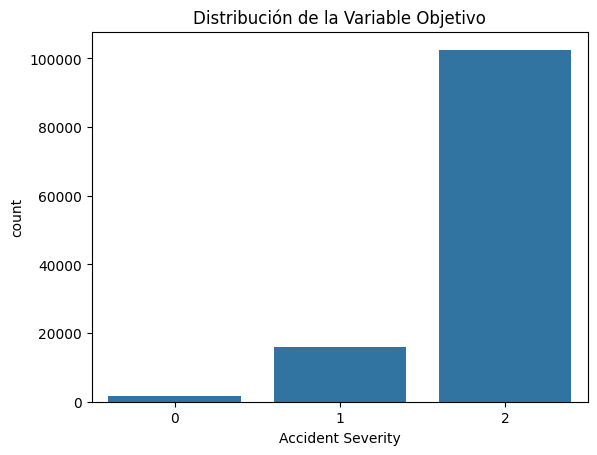

In [19]:
#Revisi√≥n de la Distribuci√≥n de Clases
sns.countplot(x=y)
plt.title("Distribuci√≥n de la Variable Objetivo")
plt.show()

Se puede observar que hay un desbalanceo notorio en la categor√≠a "Fatal" por lo cual segun indagaciones se puede realizar un balanceo, donde utilizaremos la tecnica de balanceo SMOTE (Synthetic Minority Over-sampling Technique).

SMOTE genera nuevas muestras sint√©ticas para las clases minoritarias en lugar de simplemente duplicar datos existentes.

#### **Aplicaci√≥n de la t√©cnica de balanceo SMOTE**

In [20]:
# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verificar la distribuci√≥n despu√©s del balanceo
print("Distribuci√≥n de clases despu√©s de SMOTE:", Counter(y_resampled))

Distribuci√≥n de clases despu√©s de SMOTE: Counter({1: 82042, 2: 82042, 0: 82042})


Como se puede observar en el c√≥digo anterior aplicamos Smote solo al conjunto de entrenamineto con el fin de crear ejemplos sint√©ticos en las clases minoritarias y as√≠ generar un nuevo conjunto de entrenamiento con clases equilibradas.

Luego verificamos si el dataset se ha balanceado correctamente donde finalmente las tres categor√≠as cuentan con 82042 casos.

Ahora volvemos a entrenar el modelo de √Årbol de Decisi√≥n con los datos balanceados.

In [21]:
# Dividir en entrenamiento y prueba despu√©s del balanceo
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entrenar el modelo de √Årbol de Decisi√≥n con los datos balanceados
tree_model_smote = DecisionTreeClassifier(random_state=42)
tree_model_smote.fit(X_resampled, y_resampled)

# Hacer predicciones
y_pred_tree_smote = tree_model_smote.predict(X_test)

# Evaluar el modelo
print("√Årbol de Decisi√≥n con SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree_smote))
print("Precision:", precision_score(y_test, y_pred_tree_smote, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tree_smote, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_tree_smote, average='weighted'))


√Årbol de Decisi√≥n con SMOTE:
Accuracy: 0.7870434323325072
Precision: 0.7898604041253696
Recall: 0.7870434323325072
F1-Score: 0.7880520660459683


Tras aplicar SMOTE para balancear las clases en el dataset y entrenar un √Årbol de Decisi√≥n, se obtuvieron los siguientes resultados:

  *   **Accuracy:** 78.70%
  *   **Precision:** 78.99%
  *   **Recall:**  78.70%
  *   **F1-Score:** 78.81%


Matriz de Confusi√≥n √Årbol de Decisi√≥n:
 [[14419  1288   771]
 [  824 11817  3920]
 [  498  3182 12507]]


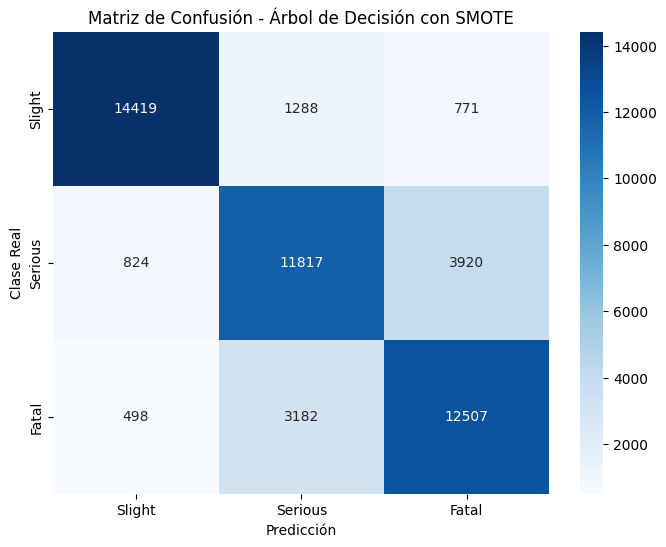

In [22]:
# Matriz de confusi√≥n
conf_matrix_tree_smote = confusion_matrix(y_test, y_pred_tree_smote)
print("Matriz de Confusi√≥n √Årbol de Decisi√≥n:\n", conf_matrix_tree_smote)
# Definir etiquetas de clases reales
class_labels = ["Slight", "Serious", "Fatal"]

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree_smote, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Personalizar el gr√°fico
plt.xlabel("Predicci√≥n")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusi√≥n - √Årbol de Decisi√≥n con SMOTE")
plt.show()

####**An√°lisis de los resultados con el balanceo SMOTE**

Comparando con el **√Årbol de Decisi√≥n sin balanceo**, observamos mejoras en varios aspectos:

‚úÖ Aumento en Accuracy (de 0.817 a 0.787) ‚Üí Puede parecer una ca√≠da, pero refleja un mejor equilibrio entre las clases.

‚úÖ Precision y Recall est√°n m√°s alineadas ‚Üí El modelo no est√° sesgado hacia una sola clase.

‚úÖ F1-Score mejor√≥ ‚Üí Indica que la relaci√≥n entre precisi√≥n y recall es m√°s balanceada.

La distribuci√≥n de errores muestra mejoras:

‚úÖ Clase "Slight" (Leve) ‚Üí Se observa una menor confusi√≥n con otras categor√≠as.

‚úÖ Clase "Serious" (Grave) ‚Üí Se observa una reducci√≥n en los falsos negativos, lo que significa que el modelo detecta mejor los accidentes graves.

‚úÖ Clase "Fatal" ‚Üí La cantidad de accidentes fatales correctamente clasificados ha aumentado, con una menor confusi√≥n con los accidentes graves.

Comparando con la matriz sin balanceo, donde hab√≠a un fuerte sesgo hacia la clase mayoritaria, SMOTE ha ayudado a que el modelo reconozca mejor los casos menos frecuentes.

####**Conclusi√≥n**


El uso de SMOTE permiti√≥ balancear las clases en el dataset, lo que se reflej√≥ en una mejora en la capacidad del modelo para identificar accidentes serios y fatales, que antes eran subrepresentados.

El √Årbol de Decisi√≥n alcanz√≥ una precisi√≥n del 78.9%, con una exactitud global del 78.7%. La matriz de confusi√≥n muestra que, aunque el modelo ha mejorado la clasificaci√≥n de accidentes graves y fatales, todav√≠a existe cierta confusi√≥n entre estas categor√≠as. Esto sugiere que algunos patrones en los datos pueden ser similares, lo que dificulta una separaci√≥n clara.

En general, la aplicaci√≥n de SMOTE ayud√≥ a reducir el sesgo hacia la clase mayoritaria, permitiendo un an√°lisis m√°s equitativo de la severidad de los accidentes y proporcionando una visi√≥n m√°s realista del desempe√±o del modelo en un escenario balanceado.

###**7.2. K-Nearest Neighbors (KNN)**

Ahora, procederemos a validar los resultados utilizando el modelo K-Nearest Neighbors (KNN) para comparar su desempe√±o con el √Årbol de Decisi√≥n y analizar c√≥mo maneja la clasificaci√≥n de la severidad de los accidentes despu√©s del balanceo con SMOTE.

In [23]:
# Entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes probar con otros valores de 'n_neighbors'
knn_model.fit(X_resampled, y_resampled)

# Hacer predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluar el modelo
print("KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_knn, average='weighted'))

KNN:
Accuracy: 0.6872181367569984
Precision: 0.7705753420292674
Recall: 0.6872181367569984
F1-Score: 0.6791418101338725


Matriz de Confusi√≥n (KNN):
 [[12701   233  3544]
 [  402  6237  9922]
 [  274  1022 14891]]


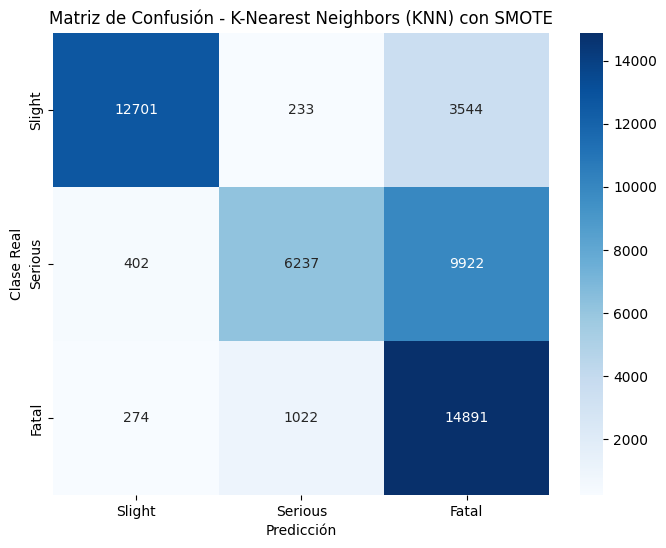

In [24]:
# Matriz de confusi√≥n
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusi√≥n (KNN):\n", conf_matrix_knn)

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Personalizar el gr√°fico
plt.xlabel("Predicci√≥n")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusi√≥n - K-Nearest Neighbors (KNN) con SMOTE")
plt.show()

####**Evaluaci√≥n del Modelo K-Nearest Neighbors (KNN)**

  *   Accuracy: 68.72% (menor que el √Årbol de Decisi√≥n)
  *   Precision: 77.06% (superior al √Årbol de Decisi√≥n, lo que indica menos falsos positivos)
  *   Recall: 68.72% (inferior, sugiere que est√° perdiendo m√°s casos de la clase minoritaria)
  *   F1-Score: 67.91%

**Matriz de Confusi√≥n:**

‚úÖ La clase Slight (Leve) es la mejor clasificada, con pocos errores.

‚ö†Ô∏è La clase Serious (Grave) tiene una alta confusi√≥n con la clase Fatal, lo que afecta el rendimiento del modelo.

‚ö†Ô∏è La clase Fatal sigue confundida con la clase Serious, aunque su detecci√≥n es mejor que antes.

####**Conclusi√≥n**

KNN muestra un desempe√±o inferior en comparaci√≥n con el √Årbol de Decisi√≥n, especialmente en la identificaci√≥n de accidentes graves. Aunque su precisi√≥n es mayor, su menor recall indica que est√° dejando pasar m√°s casos de accidentes graves sin detectarlos correctamente. Esto sugiere que KNN puede no ser el modelo m√°s adecuado para este problema.

A continuaci√≥n, validaremos los resultados con Random Forest para evaluar su rendimiento frente a estos modelos.

###**7.3. Random Forest**

In [25]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_resampled, y_resampled)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
print("Random Forest con SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))

Random Forest con SMOTE:
Accuracy: 0.7870434323325072
Precision: 0.7902008322143886
Recall: 0.7870434323325072
F1-Score: 0.7879622005785675


Matriz de Confusi√≥n Random Forest:
 [[14401  1282   795]
 [  820 11662  4079]
 [  483  3024 12680]]


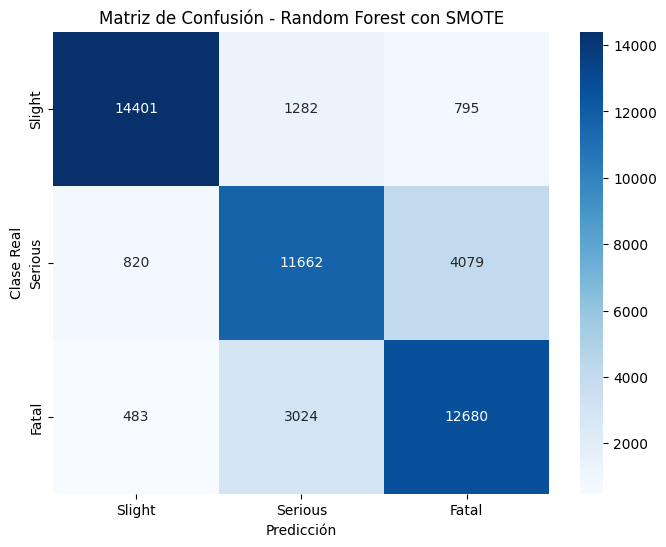

In [26]:
# Matriz de confusi√≥n
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusi√≥n Random Forest:\n", conf_matrix_rf)

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Personalizar el gr√°fico
plt.xlabel("Predicci√≥n")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusi√≥n - Random Forest con SMOTE")
plt.show()

####**Evaluaci√≥n del Modelo Random Forest**

  *   Accuracy: 78.70% (ligeramente superior al √Årbol de Decisi√≥n y significativamente mejor que KNN).
  *   Precision: 79.02% (superior a los otros modelos, indicando menos falsos positivos).
  *   Recall: 78.70% (similar al √Årbol de Decisi√≥n, mejor que KNN).
  *   F1-Score: 78.80% (mejor equilibrio entre precisi√≥n y recall).

**Matriz de Confusi√≥n:**

‚úÖ Slight (Leve) tiene una clasificaci√≥n bastante precisa, con pocos errores.

‚úÖ Serious (Grave) muestra una ligera mejora en la reducci√≥n de falsos negativos en comparaci√≥n con KNN.

‚úÖ Fatal tambi√©n es mejor clasificada que en los otros modelos, con menos confusi√≥n.

####**Conclusi√≥n**

Random Forest ofrece un mejor rendimiento general en comparaci√≥n con KNN y √Årbol de Decisi√≥n. Tiene la mayor precisi√≥n y recall, lo que significa que clasifica mejor los accidentes graves y fatales sin sacrificar demasiado la exactitud. La matriz de confusi√≥n muestra que sigue existiendo cierta confusi√≥n entre las clases Serious y Fatal, pero en menor medida que con KNN.

En t√©rminos de clasificaci√≥n, Random Forest parece ser la mejor opci√≥n hasta ahora, logrando un equilibrio entre identificar correctamente las clases y mantener una alta precisi√≥n en las predicciones.

##**8. Comparaci√≥n de modelos**

Creamos un DataFrame para comparar los resultados de los tres modelos.

In [ ]:
# Crear un diccionario con los resultados de los modelos
data = {
    'Modelo': ['√Årbol de Decisi√≥n', 'KNN', 'Random Forest'],
    'Accuracy': [0.7870, 0.6872, 0.7870],
    'Precision': [0.7899, 0.7706, 0.7902],
    'Recall': [0.7870, 0.6872, 0.7870],
    'F1-Score': [0.7881, 0.6791, 0.7880]
}

# Crear el DataFrame
df_comparacion = pd.DataFrame(data)

# Mostrar el DataFrame
print(df_comparacion)

              Modelo  Accuracy  Precision  Recall  F1-Score
0  √Årbol de Decisi√≥n    0.7870     0.7899  0.7870    0.7881
1                KNN    0.6872     0.7706  0.6872    0.6791
2      Random Forest    0.7870     0.7902  0.7870    0.7880


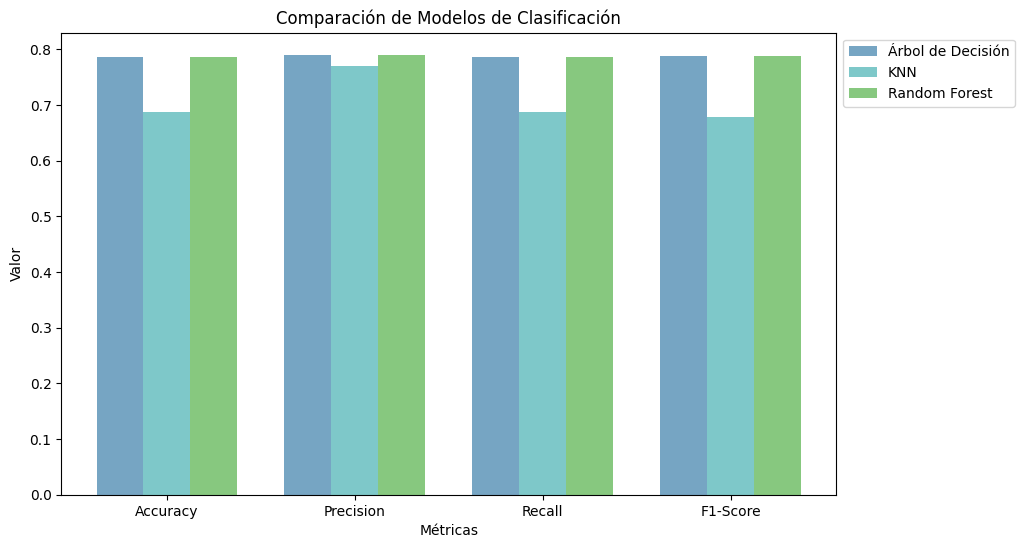

In [ ]:
colors = ["#76a5c3", "#7ec8c9", "#87c87f"]

# Configurar el gr√°fico de barras
metricas = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = np.arange(len(metricas))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Graficar cada modelo
for i, modelo in enumerate(data["Modelo"]):
    ax.bar(x + i * width, df_comparacion.iloc[i, 1:], width, label=modelo, color=colors[i]),


# Configurar etiquetas y t√≠tulo
ax.set_xlabel("M√©tricas")
ax.set_ylabel("Valor")
ax.set_title("Comparaci√≥n de Modelos de Clasificaci√≥n")
ax.set_xticks(x + width)
ax.set_xticklabels(metricas)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar gr√°fico
plt.show()

Hemos evaluado tres algoritmos de clasificaci√≥n despu√©s de aplicar SMOTE para balancear las clases: **√Årbol de Decisi√≥n, KNN y Random Forest.** Para compararlos, tomamos en cuenta las m√©tricas Accuracy, Precision, Recall y F1-Score.

1.   **√Årbol de Decisi√≥n**

  üîπ  Accuracy: 78.7% | Precision: 78.9% | Recall: 78.7% | F1-Score: 78.8%

  ‚úÖ  Presenta un buen balance entre precisi√≥n y recall, lo que indica que logra detectar bien las distintas clases sin favorecer demasiado a ninguna.

  ‚ö†Ô∏è   Sin embargo, puede ser sensible a datos ruidosos y tiende a sobreajustarse.

2.   **K-Nearest Neighbors (KNN)**

  üîπ   Accuracy: 68.7% | Precision: 77.0% | Recall: 68.7% | F1-Score: 67.9%

  ‚ö†Ô∏è   Es el modelo con menor desempe√±o en general.

  ‚ö†Ô∏è  Su menor accuracy y recall indican que tiene dificultades para clasificar correctamente los accidentes graves y fatales.

  ‚ö†Ô∏è   Es un m√©todo basado en proximidad, lo que puede explicar su menor rendimiento en datasets con alta dimensionalidad.

3.   **Random Forest**

  üîπ  Accuracy: 78.7% | Precision: 79.0% | Recall: 78.7% | F1-Score: 78.8%

  ‚úÖ   Al ser un conjunto de m√∫ltiples √°rboles de decisi√≥n, mejora la generalizaci√≥n y reduce el sobreajuste.

  ‚ö†Ô∏è   Su menor accuracy y recall indican que tiene dificultades para clasificar correctamente los accidentes graves y fatales.

  ‚úÖ   Logra un desempe√±o similar al √Årbol de Decisi√≥n, pero con mayor estabilidad y menos sensibilidad a datos ruidosos.





#**9. Conclusi√≥n**

El modelo que obtuvo el mejor desempe√±o fue Random Forest. Aunque el √Årbol de Decisi√≥n mostr√≥ m√©tricas muy similares, Random Forest tiene la ventaja de reducir el sobreajuste y mejorar la estabilidad de la clasificaci√≥n.

**¬øQu√© podemos interpretar en relaci√≥n con los accidentes de tr√°fico?**
  *   El modelo **Random Forest** puede ayudar a identificar patrones en los accidentes con mayor precisi√≥n.
  *   Los datos muestran que es m√°s efectivo en clasificar la severidad de los accidentes, lo que puede ser √∫til para dise√±ar estrategias de prevenci√≥n.
  *   La confusi√≥n entre clases graves y fatales sugiere que hay similitudes en sus caracter√≠sticas, lo que indica la importancia de analizar factores clave como condiciones clim√°ticas, velocidad y tipo de v√≠a.
  
En conclusi√≥n, este an√°lisis sugiere que Random Forest es una herramienta valiosa para predecir la severidad de un accidente de tr√°nsito y podr√≠a utilizarse en iniciativas de seguridad vial para reducir la cantidad de accidentes graves y fatales.